# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **

The goal for this project is to identify if a student might fail without early intervention. Basically, one need to predict if students will fail or not, a binary question. It is a typical classification problem.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [148]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


In [149]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [150]:
### check for null values
student_data.isnull().values.any()

False

In [151]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [152]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.drop(['passed'],axis=1).shape[1]

# TODO: Calculate passing students
n_passed = student_data[student_data['passed']=='yes'].shape[0]

# TODO: Calculate failing students
n_failed = student_data[student_data['passed']=='no'].shape[0]

# TODO: Calculate graduation rate
grad_rate = np.mean([student_data['passed']=='yes'])*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


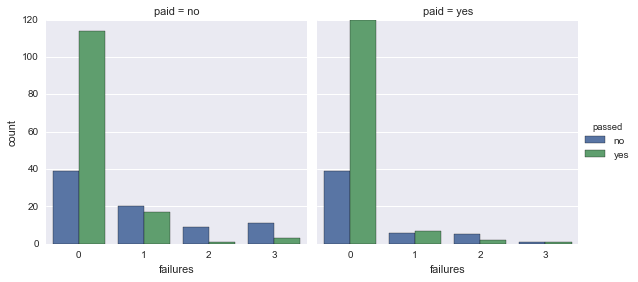

In [156]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Explore the number of past class failures and extra paid classes within the course subject 

sns.factorplot("failures", col="paid", data=student_data, hue='passed', kind="count");

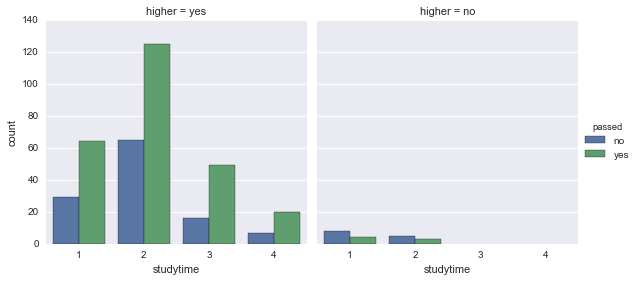

In [160]:
# Explore the wants to take higher education and study time

sns.factorplot("studytime", col="higher",data=student_data, hue='passed', kind="count");

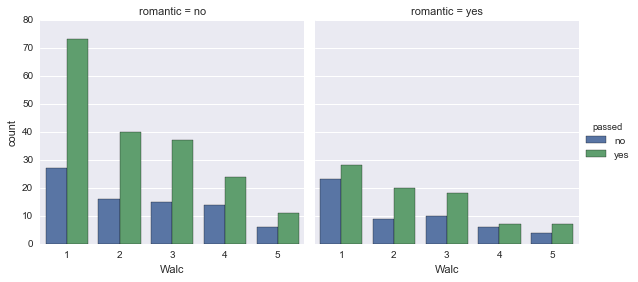

In [163]:
# Explore weekend alcohol consumption and with a romantic relationship

sns.factorplot("Walc", col="romantic",data=student_data, hue='passed', kind="count");

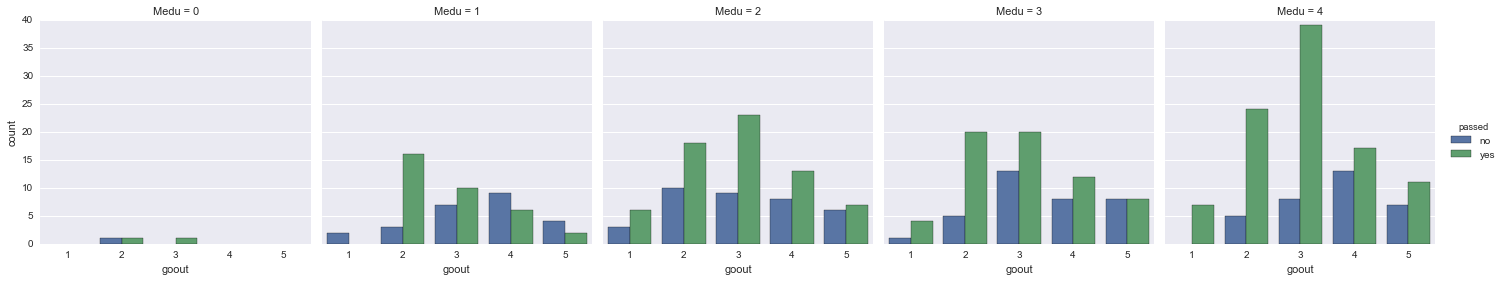

In [177]:
# Explore mother's education and go out with friends

sns.factorplot("goout", col="Medu",data=student_data, hue='passed', kind="count");

## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [164]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

In [165]:
X_all.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [166]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [167]:
# TODO: Import any additional functionality you may need here

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
# To preserve the class imbalance, you can use the "stratify" parameter in train_test_split.
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_all, y_all, stratify=y_all, test_size=num_test, random_state=0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

# Check the grad rates in both train and test sets
print "Grad rates:\nTrain set = {:.2f}%".format(100 * (y_train == 'yes').mean())
print "Test set = {:.2f}%".format(100 * (y_test == 'yes').mean())

Training set has 300 samples.
Testing set has 95 samples.
Grad rates:
Train set = 67.00%
Test set = 67.37%


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

### 1. Support Vector Machine

- Strength: Effective in high dimensional spaces, Robust to noise or outliers, Offer best classification performance on the training data, Make good decisions for data points that are outside the training set

- Weakness: If the number of features is much greater than the number of samples, the methods might perform poorly, Sensitive to tuning parameters and kernel choice, hard to run and tune

- Application: commonly used for stock market forecasting, text and hypertext categorization, classification of images, and recognization of hand-written characters. 

- Rational for using in this sproblem: Support vector machine offers best classification and does not overfit the data.

### 2. Decision tree classification

- Strength: Simple to understand and to interpret. Requires little data preparation. 

- Weakness: Decision-tree learners can create over-complex trees that do not generalise the data well. Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems. Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree. Decision tree can cause overfitting.

- Application: Used by banks to classify loan applicants by the probability of defaulting payment

- Rational for using in this sproblem: This method has been used for classifing loan applicants by the probability of defaulting payment which is similar to this problem.

### 3. LogisticRegression

- Strength: A pretty well-behaved classification algorithm that can be trained as long as you expected your features to be roughly linear and the problem to be linearly separable. You can do some feature engineering to turn most non-linear features into linear pretty easily. Robut to noise and you can avoid overfitting and even do feature selection by using l2 or l1 regularization. Computationally inexpensive, easy update your model, pretty efficient and can be used for large dataset. Output can be interpreted as a proability. Lots of ways to regularize your model and you don't have to worry about your features being correlated

- Weakness: It can hardly handle categorical (binary) features. Prone to underfitting, may have low accuracy

- Application: Commonly used for binary classification. for example, a student is either academically successful or not.

- Rational for using in this sproblem: this method has beens used for prediction similar binary classification problem



### Ensemble methods (option)

There are two families of ensemble methods: 
**1. Average methods:** for example Bagging, build several estimators independently and then average their predictions.
**2. Boosting methods:** for example Adaboost, base estimators are built sequentially and thus reduce the biases of the combined estimator

- Strength: In general, ensemble methods offer good accuracy and overfitting is not an issue. Adaboosting is capable reducing both bias and variance, has good generalisation properties, output converges to the logarithm of likelihood ratio. In low noise cases, AdaBoost gives good performance because it is able to optimize the ensemble without overfitting. Bagging and Randomization do well in both the noisy and noise free cases because they are focusing on the statistical problem and noise increases this statistical problem. In very large datasets, Random forest can be expected to do better than Bagging because bootstrap replicates of a large training set are very similar to the training set itself and hence the learned decision tree will not be very diverse. Random forest creates diversity under all conditions but at the risk of generating low quality decision trees. 

- Weakness: In high noise cases, AdaBoost puts a large amount of weight on the mislabeled examples and this leads it to overfit very badly. 

- Application: Although ensemble methods can help you win machine learning competitions by devising sophisticated algorithms and producing results with high accuracy, it is often not preferred in the industries where interpretability is more important.

- Rational for using in this sproblem: I would not use these methods because ensemble methods are not preferred in the industries.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [168]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [169]:
# normalize the features
from sklearn.preprocessing import Normalizer
normer = Normalizer()
X_train = normer.fit_transform(X_train)
X_test = normer.transform(X_test)

In [170]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the three models
clf_A = SVC(random_state=0)
clf_B = DecisionTreeClassifier(random_state=0)
clf_C = LogisticRegression(random_state=0)

# loop through models, then through train size
for clf in [clf_A, clf_B, clf_C]:
    
    # print the estimator type
    print "\n{}: \n".format(clf.__class__.__name__)
    
    # create training data from first 100, then 200, then 300
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


SVC: 

Training a SVC using a training set size of 100. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.7952.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.8050.
Training a SVC using a training set size of 200. . .
Trained model in 0.0060 seconds
Made predictions in 0.0050 seconds.
F1 score for training set: 0.8060.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.8050.
Training a SVC using a training set size of 300. . .
Trained model in 0.0140 seconds
Made predictions in 0.0140 seconds.
F1 score for training set: 0.8024.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.8050.

DecisionTreeClassifier: 

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0040 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7704.
Training a DecisionTreeClassifier using a training set

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVC**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0020           |      0.0010            |      0.7952      |    0.8050       |
| 200               |        0.0050           |      0.0010            |      0.8060      |    0.8050       |
| 300               |        0.0060           |      0.0100            |      0.8024      |    0.8050       |

** Classifer 2 - DT**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0020              |      0.0000            |     1.0000       |    0.7704       |
| 200               |     0.0060              |      0.0000            |     1.0000       |    0.7258       |
| 300               |     0.0070              |      0.0000            |     1.0000       |    0.6667      |

** Classifer 3 - LR**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0010              |     0.0020             |    0.8199        |     0.7975      |
| 200               |     0.0010              |     0.0020             |    0.8060        |     0.8050      |
| 300               |     0.0020              |     0.0000             |    0.8024        |     0.8050      |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

I would first exclude the model derived from decision tree(DT). First, model derived from DT has big difference between train and test F1 score, suggesting potential overfitting problem. Second, increasing the train size usually should increase the accuracy (here is the F1 score), however the F1 score was reduced when the training set size increased to 300. The model derived from support vector machine (SVM) also has a similar problem as saw in DT model. Increasing the train size was not helpful for improvement of the accuracy for both train and test F1 score. In contrast, Increasing the train size was beneficial of train and test F1 score for model derived from Logistic Regression (LR). As we all know, model derived from SVM is hard to understand and interpret, while model derived from LR can be interpreted as a probability. Further, Out of three models, the one derived from LR showed the best F1 score and very efficient training and prediction time. Based on these facts, I would select the model derived from LR as the best model for further optimization. 

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

Logistic Regression (LR) classification is a commonly used in binary classification. LR output can be converted a probability so can be easily interpreted. 

LR takes students' features (e.g. age, gender, studytime) and generates a model which weights in features according to their associations with the classes. Unrelated features can be weighted as zero. Then we sum up all the weighted value of each feature. The summed value then converts to a probability by commonly used sigmoid function. 

To predict if a new student will fail or not, one just need plug in the new student's features. The output value above 0.5 will be predicted as positive class. The probability also provides how confident about the prediction. For example, 1 means you are 100% sure that the classification is positive, zero means you are sure that the classification is negative.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [175]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
#from sklearn.linear_model import LogisticRegressionCV

# TODO: Create the parameters list you wish to tune  # 
parameters = {
    'class_weight':[None, 'balanced'],
    'penalty':['l1', 'l2'],
    'C': np.logspace(-3,3,20)
    }

# TODO: Initialize the classifier
clf = LogisticRegression(random_state=0)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label="yes")

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters,scoring=f1_scorer) 

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

# Check the model with the optimized parameters
print "\n"
print grid_obj.best_estimator_

Made predictions in 0.0010 seconds.
Tuned model has a training F1 score of 0.8326.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.8133.


LogisticRegression(C=2.9763514416313162, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [172]:
# calculate accuracy
print "Tuned model has a accuracy of {:.4f}.".format(np.mean(clf.predict(X_test) == y_test)*100)  # not so impressive

Tuned model has a accuracy of 70.5263.


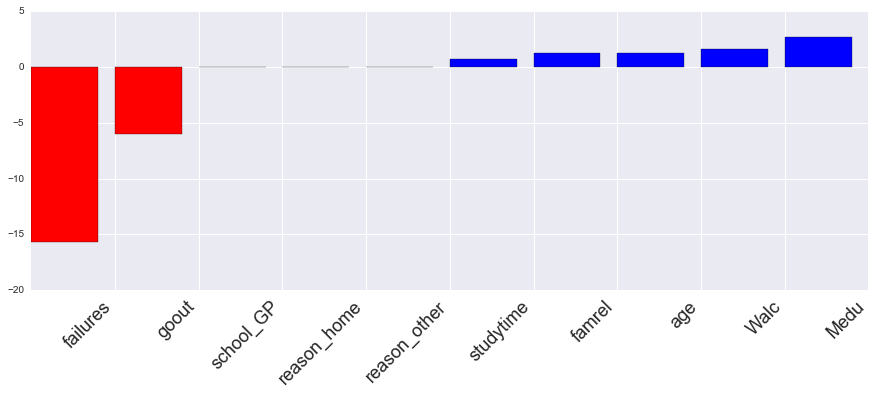

In [173]:
# look at top 5 features
coef = clf.coef_.ravel()  ## use the variable name for the Logistic classifier
pos_coef = np.argsort(coef)[-5:]
neg_coef = np.argsort(coef)[:5]
look_coef = np.hstack([neg_coef, pos_coef])

# plot the coeffs
plt.figure(figsize=(15, 5))
colors = ["red" if c < 0 else "blue" for c in coef[look_coef]]
plt.bar(np.arange(10), coef[look_coef], color=colors)
feats = np.array(X_all.columns)
plt.xticks(np.arange(1, 11), feats[look_coef],size=18, rotation=45, ha="right");

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

The F1 score was improved from 0.8050 to 0.8133 after grid search tunning, a marginal improvement. It is worth to note that F1 score is a score which balances recall and precision. However, for this specific problem, we should care more about the false positive cases who actually fail but are incorrectly predicted as 'passed'. Because we don't want to miss those cases so that early intervention can be applied to them.

In [174]:
# Check the precision score

from sklearn.metrics import precision_score
print "Tuned model has a precision score of {:.4f}.".format(precision_score(y_test, clf.predict(X_test), pos_label="yes"))

Tuned model has a precision score of 0.7093.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.